<a href="https://colab.research.google.com/github/daiki-skm/oreilly-web-optimization/blob/main/chapter1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
print('Hello World!')

Hello World!


In [3]:
import numpy as np
thetas = np.linspace(0, 1, 1001)
print(thetas)

[0.    0.001 0.002 ... 0.998 0.999 1.   ]


In [4]:
likelihood = lambda r: thetas if r else (1-thetas)


In [5]:
def posterior(r, prior):
  lp = likelihood(r) * prior
  return lp / lp.sum()

In [6]:
p = np.array([1/len(thetas) for _ in thetas])
print(p)

[0.000999 0.000999 0.000999 ... 0.000999 0.000999 0.000999]


In [7]:
p = posterior(1,p)
print(p)

[0.00000000e+00 1.99800200e-06 3.99600400e-06 ... 1.99400599e-03
 1.99600400e-03 1.99800200e-03]


In [8]:
from matplotlib import pyplot as plt

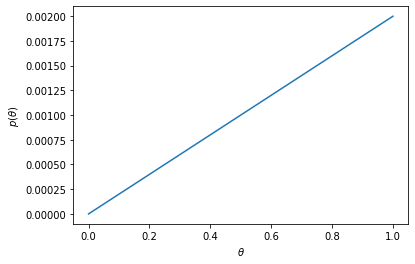

In [9]:
plt.plot(thetas, p)
plt.xlabel(r'$\theta$')
plt.ylabel(r'$p(\theta)$')
plt.show()

In [10]:
clicks = 2
noclicks = 38

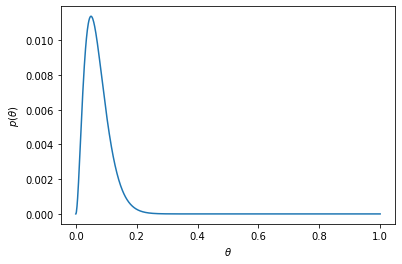

In [13]:
p = np.array([1/len(thetas) for _ in thetas])
for _ in range(clicks):
  p = posterior(1,p)
for _ in range(noclicks):
  p = posterior(0,p)
plt.plot(thetas, p)
plt.xlabel(r'$\theta$')
plt.ylabel(r'$p(\theta)$')
plt.show()

In [14]:
likelihood = lambda a, N: thetas ** a * (1-thetas) ** (N-a)

In [15]:
def posterior(a, N, prior):
  lp = likelihood(a, N) * prior
  return lp / lp.sum()

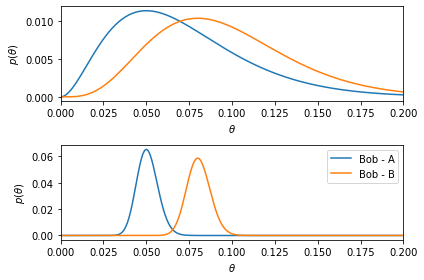

In [16]:
prior = 1/len(thetas)
plt.subplot(2,1,1)
plt.plot(thetas, posterior(2,40,prior), label='Alice - A')
plt.plot(thetas, posterior(4,50,prior), label='Alice - B')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$p(\theta)$')
plt.xlim(0,0.2)

plt.subplot(2,1,2)
plt.plot(thetas, posterior(64,1280,prior), label='Bob - A')
plt.plot(thetas, posterior(128,1600,prior), label='Bob - B')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$p(\theta)$')
plt.xlim(0,0.2)

plt.legend()
plt.tight_layout()
plt.show()

In [18]:
def betaf(alpha, beta):
  numerator = thetas ** (alpha-1) * (1-thetas) ** (beta-1)
  return numerator / numerator.sum()

In [20]:
def posterior(a, N):
  return betaf(a+1, N-a+1)

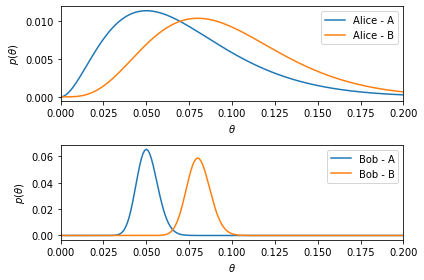

In [21]:
plt.subplot(2,1,1)
plt.plot(thetas, posterior(2,40), label='Alice - A')
plt.plot(thetas, posterior(4,50), label='Alice - B')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$p(\theta)$')
plt.xlim(0,0.2)
plt.legend()

plt.subplot(2,1,2)
plt.plot(thetas, posterior(64,1280), label='Bob - A')
plt.plot(thetas, posterior(128,1600), label='Bob - B')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$p(\theta)$')
plt.xlim(0,0.2)

plt.legend()
plt.tight_layout()
plt.show()

In [22]:
def hmv(xs, ps, alpha=0.95):
  xps = sorted(zip(xs, ps), key=lambda xp: xp[1], reverse=True)
  xps = np.array(xps)
  xs = xps[:, 0]
  ps = xps[:, 1]
  return np.sort(xs[np.cumsum(ps) <= alpha])

In [23]:
thetas = np.linspace(0,1,1001)

def posterior(a, N):
  alpha = a + 1
  beta = N - a + 1
  numerator = thetas ** (alpha-1) * (1-thetas) ** (beta-1)
  return numerator/numerator.sum()

ps = posterior(2,40)

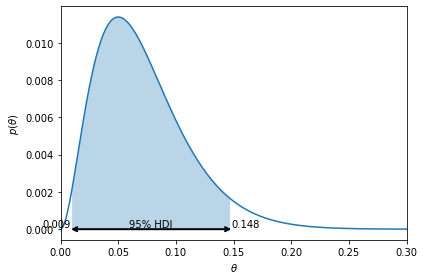

In [25]:
hm_thetas = hmv(thetas, ps, alpha=0.95)
plt.plot(thetas, ps)
plt.annotate('', xy=(hm_thetas.min(), 0), xytext=(hm_thetas.max(), 0), arrowprops=dict(color='black', shrinkA=0, shrinkB=0, arrowstyle='<->', linewidth=2))
plt.annotate('%.3f' % hm_thetas.min(), xy=(hm_thetas.min(), 0), ha='right', va='bottom')
plt.annotate('%.3f' % hm_thetas.max(), xy=(hm_thetas.max(), 0), ha='left', va='bottom')
plt.annotate('95% HDI', xy=(hm_thetas.mean(), 0), ha='center', va='bottom')
hm_region = (hm_thetas.min() < thetas) & (thetas < hm_thetas.max())
plt.fill_between(thetas[hm_region], ps[hm_region], 0, alpha=0.3)
plt.xlabel(r'$\theta$')
plt.ylabel(r'$p(\theta)$')
plt.xlim(0,0.3)
plt.tight_layout()
plt.show()

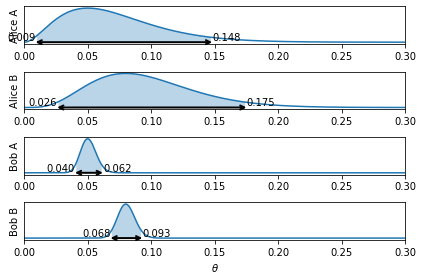

In [26]:
def plot_hdi(ps, label):
  hm_thetas =hmv(thetas, ps, 0.95)
  plt.plot(thetas, ps)
  plt.annotate('', xy=(hm_thetas.min(), 0), xytext=(hm_thetas.max(), 0), arrowprops=dict(color='black', shrinkA=0, shrinkB=0, arrowstyle='<->', linewidth=2))
  plt.annotate('%.3f' % hm_thetas.min(), xy=(hm_thetas.min(), 0), ha='right', va='bottom')
  plt.annotate('%.3f' % hm_thetas.max(), xy=(hm_thetas.max(), 0), ha='left', va='bottom')
  hm_region = (hm_thetas.min() < thetas) & (thetas < hm_thetas.max())
  plt.fill_between(thetas[hm_region], ps[hm_region], 0, alpha=0.3)
  plt.xlim(0,0.3)
  plt.ylabel(label)
  plt.yticks([])

plt.subplot(4,1,1)
alice_a = posterior(2,40)
plot_hdi(alice_a, 'Alice A')
plt.subplot(4,1,2)
alice_b = posterior(4,50)
plot_hdi(alice_b, 'Alice B')
plt.subplot(4,1,3)
bob_a = posterior(64,1280)
plot_hdi(bob_a, 'Bob A')
plt.subplot(4,1,4)
bob_b = posterior(128,1600)
plot_hdi(bob_b, 'Bob B')
plt.xlabel(r'$\theta$')
plt.tight_layout()
plt.show()

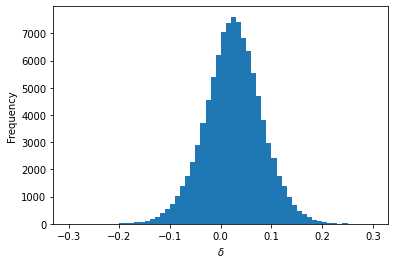

In [27]:
theta_a = np.random.beta(3,39,size=100000)
theta_b = np.random.beta(5,47,size=100000)
delta = theta_b - theta_a
plt.hist(delta,range=(-0.3,0.3),bins=60)
plt.xlabel(r'$\delta$')
plt.ylabel(r'Frequency')
plt.show()

In [28]:
print((delta > 0).mean())

0.6843
